In [162]:
#!/usr/bin/env python
from numpy import *
import numpy as np
import netCDF4
import matplotlib
matplotlib.use('TKAgg')
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
import xarray as xr
import matplotlib.patches as mpatches

#This is necessary to visualize plots in the notebook
%matplotlib inline

#Read reanalysis data
filename='eraint_2019010100.nc'
nc = netCDF4.Dataset(filename, 'r')
#Dir=np.mod(180+np.rad2deg(np.arctan2(U, V)),360)
#Print and extract the content
#print(ncf)
# lons=ncf.variables['longitude'][:]
# lats=ncf.variables['latitude'][:]
# u=ncf.variables['u'][0,:]
# v=ncf.variables['v'][0,:]
# ncf.close()

In [163]:
#print(ncf.variables.keys())
for i in nc.variables:
    print(i, nc.variables[i].units, nc.variables[i].shape)

longitude degrees_east (360,)
latitude degrees_north (181,)
time hours since 1900-01-01 00:00:00.0 (1,)
z m**2 s**-2 (1, 181, 360)
vo s**-1 (1, 181, 360)
u m s**-1 (1, 181, 360)
v m s**-1 (1, 181, 360)


In [178]:
import xarray as xr
from mpl_toolkits.basemap import Basemap
data = xr.open_dataset('eraint_2019010100.nc')
data['wind_speed'] = (data['u']**2 + data['v']**2)**(1/2)
data['wind_dir']=np.mod(180+np.rad2deg(np.arctan2(data['u'], data['v'])),360)
lons=data.variables['longitude'][:]
lats=data.variables['latitude'][:]
u=data.variables['u'][0,:]
v=data.variables['v'][0,:]
wind_speed=data.variables['wind_speed'][0,:]
wind_dir=data.variables['wind_dir'][0,:]
#data['mean_zonal_wind'] = data['u'].mean(dim = 'time')
#mzw=data.variables['mean_zonal_wind'][:]

In [195]:
r=np.arange(0,91,1)
p=np.arange(0,361,1)

In [198]:
#j = np.abs(lats - 0).argmin()
#u_nh = u[:,j] 
lt = []
for i in p:
    for j in r:
        coordinates = np.unravel_index((np.abs(lats - j) + np.abs(lons-i)).argmin(), lats.shape)
        lt.append(coordinates)

ValueError: index 32400 is out of bounds for array with size 181

C:\Users\spark\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


ValueError: not enough values to unpack (expected 2, got 1)

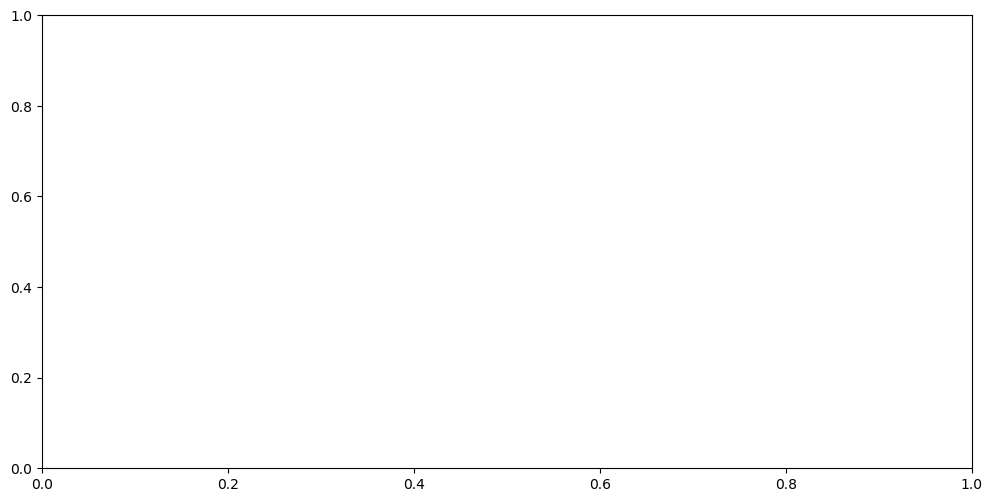

In [182]:
plt.figure(figsize=(12,6),dpi=100)
m = Basemap(projection='robin',lon_0 = 0,resolution='l')
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)
cs = m.pcolormesh(xi,yi,np.squeeze(u_nh))
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawparallels(np.arange(-90, 90, 30), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180, 181, 60), labels=[0,0,0,1], fontsize=10)
m.drawmapboundary(fill_color='aqua')
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label('$ms^{-1}$')
#cbar.set_label('degree')
plt.title('u wind component')
plt.show()

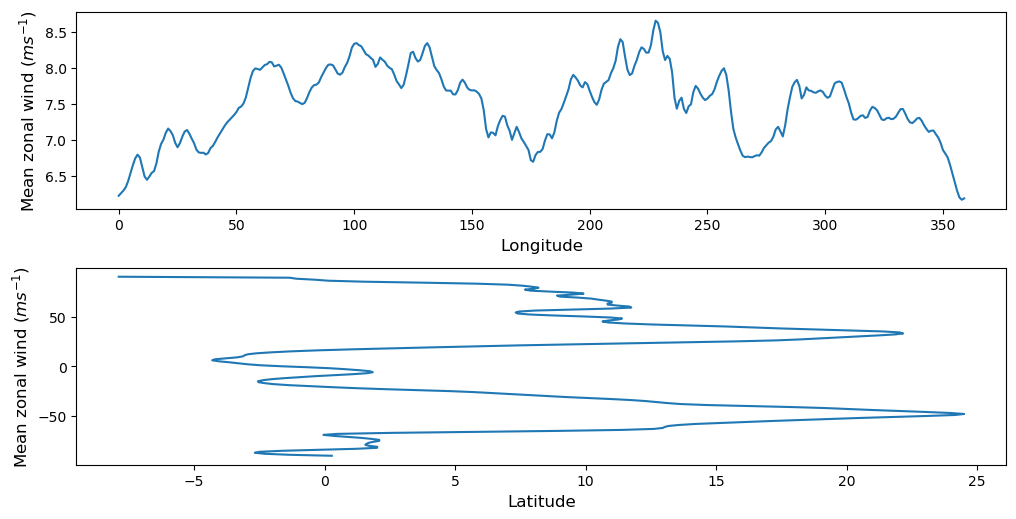

In [120]:
#Mean zonal wind 
plt.figure(figsize=(12,6),dpi=100)
plt.subplot(211)
plt.plot(lons,u.mean(axis=0))
plt.xlabel('Longitude',fontsize=12)
plt.ylabel('Mean zonal wind ($ms^{-1}$)',fontsize=12)
plt.subplot(212)
plt.plot(u.mean(axis=1),lats)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Mean zonal wind ($ms^{-1}$)',fontsize=12)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)
plt.show()

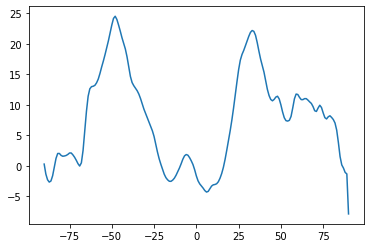

In [60]:
plt.plot(lats,u.mean(axis=1))

In [167]:
# lon_0 = lons.mean()
# lat_0 = lats.mean()
# m = Basemap(width=5000000,height=3500000,
#             resolution='l',projection='stere',\
#             lat_ts=90,lat_0=lat_0,lon_0=lon_0)
# #m = Basemap(projection = 'merc', llcrnrlat=10, urcrnrlat=50,
# #        llcrnrlon=-160, urcrnrlon=-60)

# lon, lat = np.meshgrid(lons, lats)
# xi, yi = m(lon, lat)
# # Plot Data
# cs = m.contourf(xi,yi,np.squeeze(u))

# # Add Grid Lines
# m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
# m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# # Add Coastlines, States, and Country Boundaries
# m.drawcoastlines()
# m.drawstates()
# m.drawcountries()

# cbar = m.colorbar(cs, location='bottom', pad="10%")
# cbar.set_label('$ms^{-1}$')
# plt.title('u wind component')
# plt.show()

In [174]:
#i = np.abs(lons - ).argmin()
